# Prince Ginoya
## DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION
## #GRIPJULY21 #TSF #DATASCIENCE

## DATASET : SAMPLESUPERSTORE.CSV (https://bit.ly/3i4rbWl)
## EXPLORATORY DATA ANALYSIS - RETAIL

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings ('ignore')
sns.set(style="darkgrid") 
%matplotlib inline

In [2]:
store_df=pd.read_csv('SampleSuperstore.csv')

## Data visualization

In [3]:
store_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
store_df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
store_df.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
store_df.shape

(9994, 13)

So, here we can say that number of rows are 9994 and columns are 13

In [7]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Here, we can say that 4 columns contains numeric value while, others have object data type.

Also, there are not any null values in the whole DataSet which can be clearly seen from above data means there is no missing values.

In [8]:
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
data = store_df.copy()

In [10]:
len(data[data.duplicated()])

17

Number of duplicate data is very low, that's why we will ignore the duplicate value.

#### For the question, we have been asked to visualize the data in terms of profile so, we will be mainly focusing on profit

## Q- Which ship mode brings the highest profit

In [11]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [12]:
A = pd.DataFrame(data.groupby(['Ship Mode'])['Profit'].sum()).reset_index()
A

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


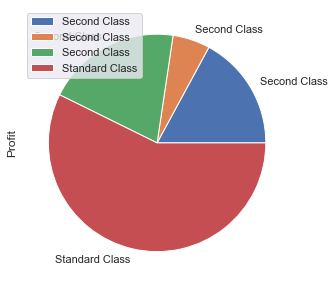

In [13]:
X = A.plot.pie(y='Profit',labels=data['Ship Mode'],figsize=(10,5))

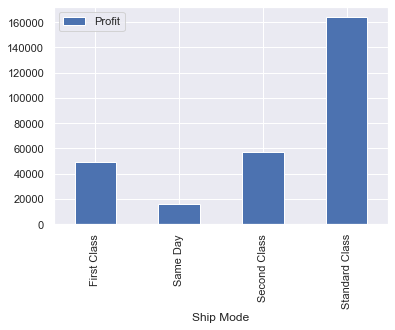

In [14]:
a=A.plot(kind='bar', x="Ship Mode", y="Profit")

## Q- Which Segment brings the highest profit

In [15]:
B=pd.DataFrame(data.groupby(['Segment'])['Profit'].sum()).reset_index()
B

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


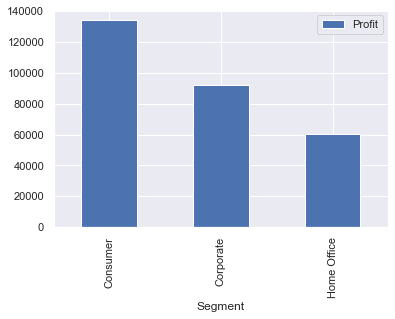

In [16]:
b=B.plot(kind='bar', x='Segment')

## Q- Which country brings the highest profit

In [17]:
C=pd.DataFrame(data.groupby(['Country'])['Profit'].sum()).reset_index()
C

,Country,Profit
0,United States,286397.0217


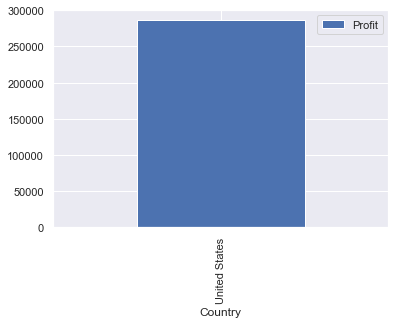

In [18]:
c=C.plot(kind='bar', x='Country')

## Q- Which Category brings the highest profit

In [19]:
data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [20]:
D=pd.DataFrame(data.groupby(['Category'])['Profit'].sum()).reset_index()
D

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


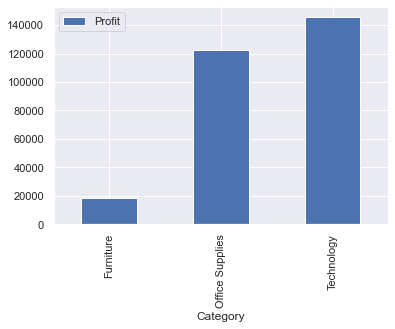

In [21]:
d=D.plot(kind='bar', x='Category')

## Profit analysis

In [22]:
pd.DataFrame(data['Profit'].describe())

,Profit
count,9994.000000
mean,28.656896
std,234.260108
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


### Top 10 cities with highest profit

In [23]:
max_profit = pd.DataFrame(data.groupby(["City"])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False).head(10)
max_profit

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [24]:
min_profit = pd.DataFrame(data.groupby(["City"])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False).tail(10)
min_profit

,City,Profit
216,Jacksonville,-2323.8350
24,Aurora,-2691.7386
375,Phoenix,-2790.8832
109,Dallas,-2846.5257
60,Burlington,-3622.8772
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485
374,Philadelphia,-13837.7674


## Conclusion :

###  -- More than 50% of the profit brings by Standard Class Ship Mode
###  -- Home office contains lowest profile which is not advicable for use
###  -- Their main focus Must be on technology category which is the most successful and profit generated type
###  -- Draw more attention towards lowest Profit generation cities to generate more sales and profit